# Video Games Sales as at 22 Dec 2016 Exploration

## by Zyad Aloqayli

# Preliminary Wrangling

> The data analyzed icludes information about approixmetly 16,000 games with ratings, and scores. Variables include year of release, genre, publisher, sales, and paltform.

In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read data (Video_Games_Sales_as_at_22_Dec_2016.csv)
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

### What is the structure of the dataset?

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(16719, 16)

> We have 16719 observations and 16 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


> The format of the column names should be changed to have it all lower case.

> The types all seem to be correct except for the user_score column.

> There are missing valuse in multiple columns that should be solved.

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
df.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
df.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
df.Publisher.value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Detn8 Games                        1
MediaQuest                         1
PopTop Software                    1
Men-A-Vision                       1
Commseed                           1
Name: Publisher, Length: 581, dtype: int64

In [10]:
df.Developer.value_counts()

Ubisoft                     204
EA Sports                   172
EA Canada                   167
Konami                      162
Capcom                      139
                           ... 
Ninja Studio                  1
Farmind Ltd                   1
Telegames, Inc.               1
Zombie                        1
Buzz Monkey, EA Montreal      1
Name: Developer, Length: 1696, dtype: int64

In [11]:
df.Rating.value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.Name.duplicated().sum()

5156

> The reason for this big number is that some games are relased on multiple platforms and to each, we have difrrent data.

In [14]:
df.query('Name == "Grand Theft Auto V"')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


# Cleaning

In [15]:
# Get a copy of the original dataframe to start the cleaning phase
df_clean = df.copy()

### The format of the column names should be changed to have it all lower case.

In [16]:
df_clean.columns = map(str.lower, df_clean.columns)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### The types all seem to be correct except for the user_score column.

In [17]:
df_clean.user_score.value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
9.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [18]:
# Replace tbd values with None
df_clean.user_score.replace('tbd', None, inplace = True)

In [19]:
df_clean.user_score.value_counts()

7.8    388
8.2    337
8      333
7.5    293
8.3    292
      ... 
0.5      2
1.3      2
1.1      2
1.5      2
0        1
Name: user_score, Length: 95, dtype: int64

In [20]:
# Now we should change the type
df_clean['user_score'] = df_clean['user_score'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       8760 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### There are missing valuse in multiple columns that should be solved.

In [21]:
df_clean.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         7959
user_count         9129
developer          6623
rating             6769
dtype: int64

> Since the columns with high numbers of null values are important to the analysis, I think dropping the null values is the best option we have in the context of this dataset.

In [22]:
df_clean.dropna(inplace=True)

In [23]:
df_clean.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
critic_score       0
critic_count       0
user_score         0
user_count         0
developer          0
rating             0
dtype: int64

In [24]:
# Save the clean dataframe
df_clean.to_csv('Video_Games_Sales_as_at_22_Dec_2016-master.csv')

In [2]:
# Read the master master datafram
video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016-master.csv')

### What is/are the main feature(s) of interest in the dataset?
> I am intersted in finding out what makes a game more sell more, what geners are more popular in certain markets.

> I also want find out if the socre of the game actully influences sales or not.

# Univariate Exploration

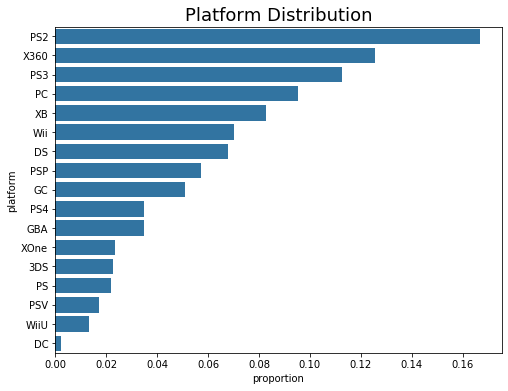

In [67]:
# Plot paltform dist
platform_counts = video_games_df.platform.value_counts()
platform_order = platform_counts.index

max_platform_count = platform_counts[0]
max_platform_prop = max_platform_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_platform_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'platform', color = base_color, order = platform_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Platform Distribution', fontsize= 18);

> 16% of the games we have in our dataset are on Play Station 2.

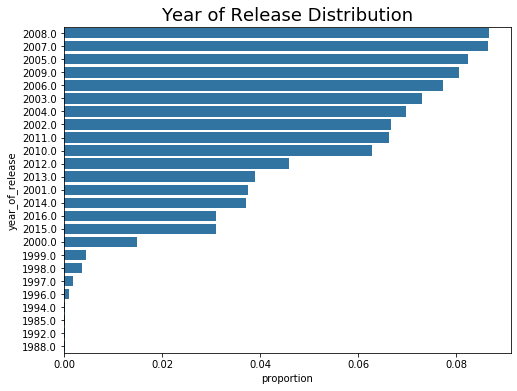

In [68]:
# Plot year_of_release dist
year_counts = video_games_df.year_of_release.value_counts()
year_order = year_counts.index
max_year_count = year_counts[year_counts.idxmax()]
max_year_prop = max_year_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_year_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'year_of_release', color = base_color, order = year_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Year of Release Distribution', fontsize= 18);

> The dataset consists mostly of gamnes that released before 2011.

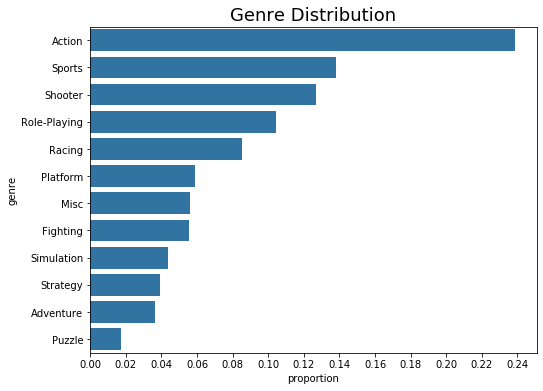

In [69]:
# Plot genre dist
genre_counts = video_games_df.genre.value_counts()
genre_order = genre_counts.index

max_genre_count = genre_counts[genre_counts.idxmax()]
max_genre_prop = max_genre_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_genre_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'genre', color = base_color, order = genre_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Genre Distribution', fontsize= 18);

> Most games have action in them.

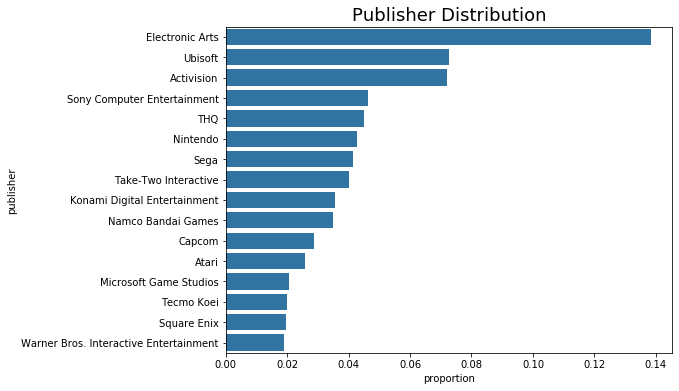

In [70]:
# Plot publisher dist
publisher_counts = video_games_df.publisher.value_counts()
publisher_order = publisher_counts.index

max_publisher_count = publisher_counts[0]
max_publisher_prop = max_publisher_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_publisher_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'publisher', color = base_color, order = publisher_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Publisher Distribution', fontsize= 18);
plt.ylim(15.5,-0.5);

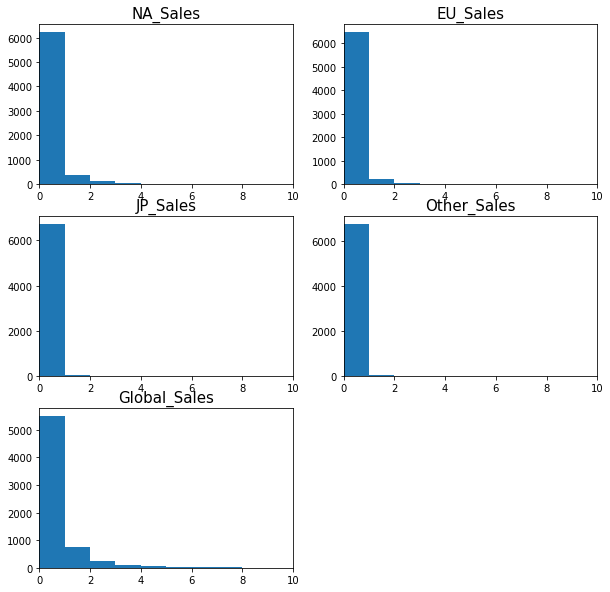

In [7]:
plt.figure(figsize = [10, 10])
# Plot na_sales
plt.subplot(3,2,1)
plt.title('NA_Sales', fontsize=15)
bins = np.arange(0,video_games_df.na_sales.max())
plt.hist(data=video_games_df, x='na_sales', bins = bins);
plt.xlim(0,10)


# Plot eu_sales
plt.subplot(3,2,2)
plt.title('EU_Sales', fontsize=15)
bins = np.arange(0,video_games_df.eu_sales.max())
plt.hist(data=video_games_df, x='eu_sales', bins = bins);
plt.xlim(0,10);

# Plot jp_sales
plt.subplot(3,2,3)
plt.title('JP_Sales', fontsize=15)
bins = np.arange(0,video_games_df.jp_sales.max())
plt.hist(data=video_games_df, x='jp_sales', bins = bins);
plt.xlim(0,10);

# Plot jp_sales
plt.subplot(3,2,4)
plt.title('Other_Sales', fontsize=15)
bins = np.arange(0,video_games_df.other_sales.max())
plt.hist(data=video_games_df, x='other_sales', bins = bins);
plt.xlim(0,10);

# Plot global_sales
plt.subplot(3,2,5)
plt.title('Global_Sales', fontsize=15)
bins = np.arange(0,video_games_df.global_sales.max())
plt.hist(data=video_games_df, x='global_sales', bins = bins);
plt.xlim(0,10);


> From the visuals above we can see that majority of games don't even break the 1 million milestone in sales.

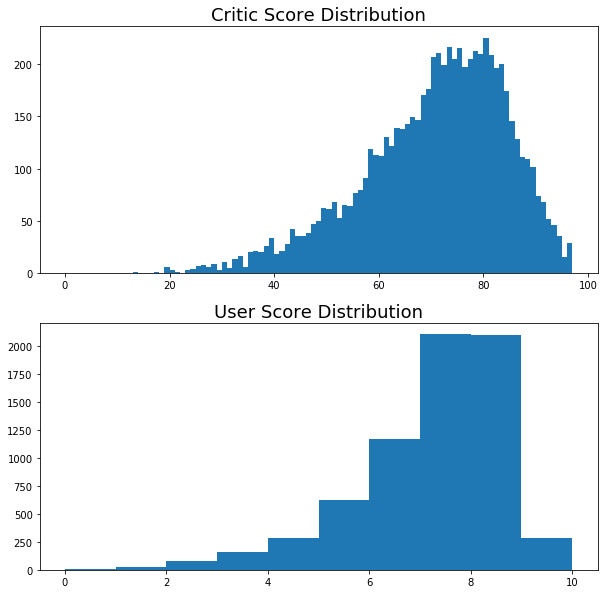

In [8]:
plt.figure(figsize = [10, 10])

# Plot cirtic_score
plt.subplot(2, 1, 1)
plt.title('Critic Score Distribution', fontsize = 18)
bins = np.arange(0,video_games_df.critic_score.max())
plt.hist(data=video_games_df, x='critic_score', bins = bins);

# Plot user_score
plt.subplot(2, 1, 2)
plt.title('User Score Distribution', fontsize = 18)
bins = np.arange(0,video_games_df.user_score.max()+1)
plt.hist(data=video_games_df, x='user_score', bins = bins);



> Critic score and user score are very similar.

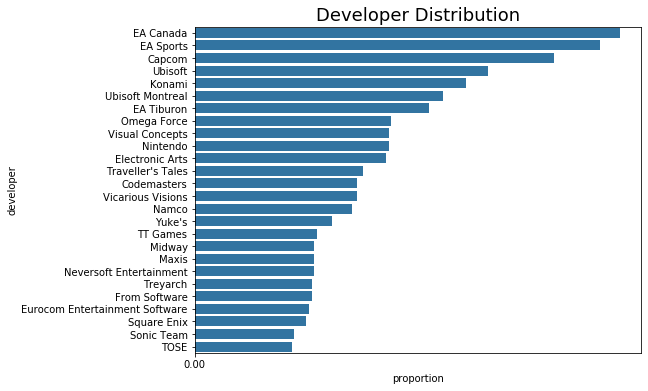

In [9]:
dev_counts = video_games_df.developer.value_counts()
dev_order = dev_counts.index

max_dev_count = dev_counts[0]
max_dev_prop = max_dev_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_dev_prop+0.02, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'developer', color = base_color, order = dev_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Developer Distribution', fontsize= 18);
plt.ylim(25.5,-0.5);

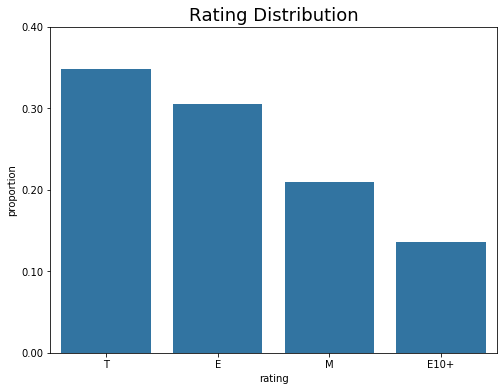

In [10]:
rating_counts = video_games_df.rating.value_counts()
rating_order = rating_counts.index

max_rating_count = rating_counts[0]
max_rating_prop = max_rating_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_rating_prop+0.1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, x = 'rating', color = base_color, order = rating_order)
plt.yticks(tick_props * video_games_df.shape[0], tick_names)
plt.ylabel('proportion');
plt.title('Rating Distribution', fontsize= 18);
plt.xlim(-0.5,3.5);

> Almost 35% of the games in the dataset have the T(for teens) rating. 

# Bivariate Exploration

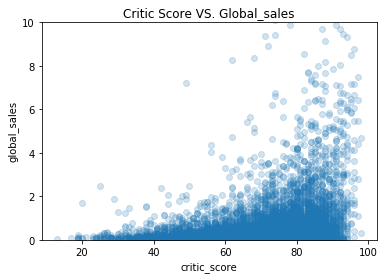

In [72]:
# Scatter plot for  critic_score vs. global_sales 
sb.regplot(fit_reg=False, data=video_games_df, x='critic_score', y='global_sales', scatter_kws={'alpha':1/5});
plt.ylim(0,10)
plt.title('Critic Score VS. Global_sales');

> There is a positive relashionship between critics score and global sales.

> Hence, I would say that critics score does have an imapact on global sales.

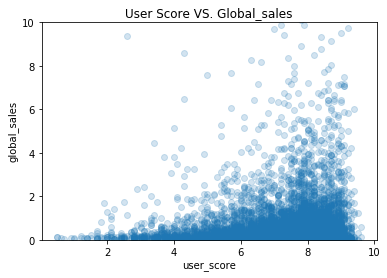

In [71]:
# Scatter plot for  user_score vs. global_sales 
sb.regplot(fit_reg=False, data=video_games_df, x='user_score', y='global_sales', scatter_kws={'alpha':1/5});
plt.ylim(0,10)
plt.title('User Score VS. Global_sales');

> There is a positive relashionship between users score and global sales.

> Hence, I would say that users score does have an imapact on global sales.

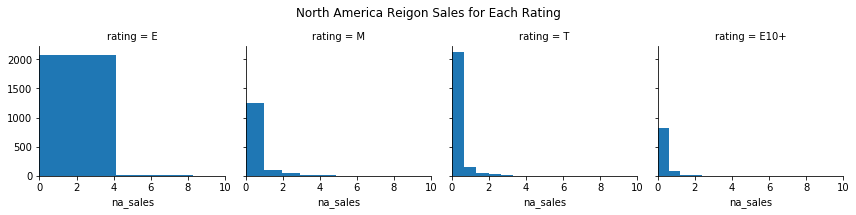

In [64]:
# Datframe for ratings in(T, E, M, E10+)
ratings_df = video_games_df.query('rating == "T" or rating == "M" or rating == "E" or rating == "E10+"')

# Plot na_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10), )
g.map(plt.hist, 'na_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('North America Reigon Sales for Each Rating');


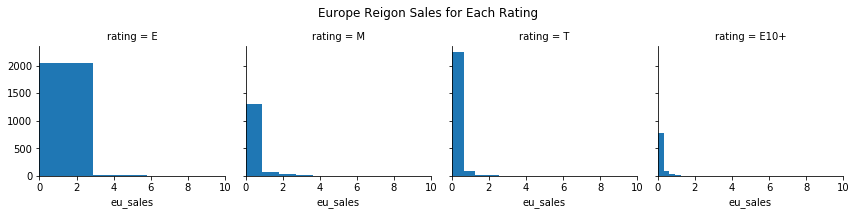

In [63]:
# Plot eu_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'eu_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Europe Reigon Sales for Each Rating');

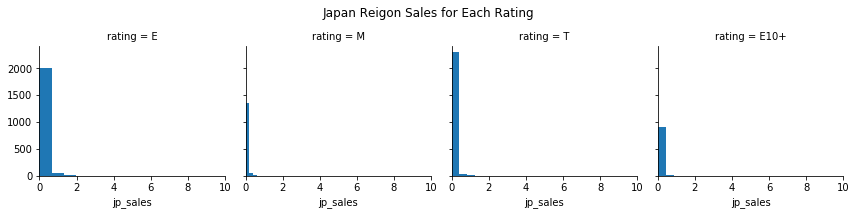

In [62]:
# Plot jp_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'jp_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Japan Reigon Sales for Each Rating');

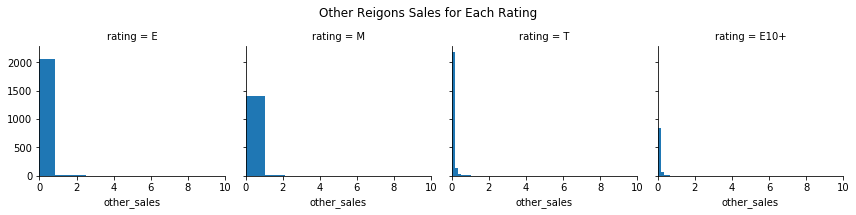

In [61]:
# Plot other regions sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'other_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Other Reigons Sales for Each Rating');

> From the visiuals above we can see that, Rating E(for everyone) sells the most in all regions.

> The games that have an M(for mature) rating sells the most in regions other than(NA, EU, JP)

> The games that have an T(for teens) rating sells the most in the NA region.

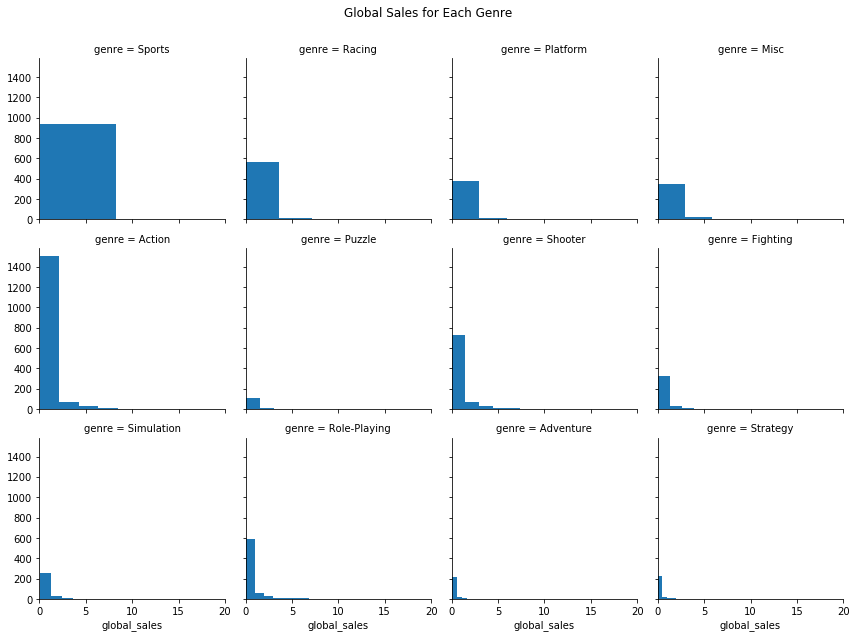

In [56]:
g = sb.FacetGrid(data=video_games_df, col='genre', col_wrap=4, xlim=(0,20))
g.map(plt.hist, 'global_sales');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Global Sales for Each Genre');

> Sports, Action, and Racing games sell the most globally.

> Puzzle, and Strategy games sell the least globally.

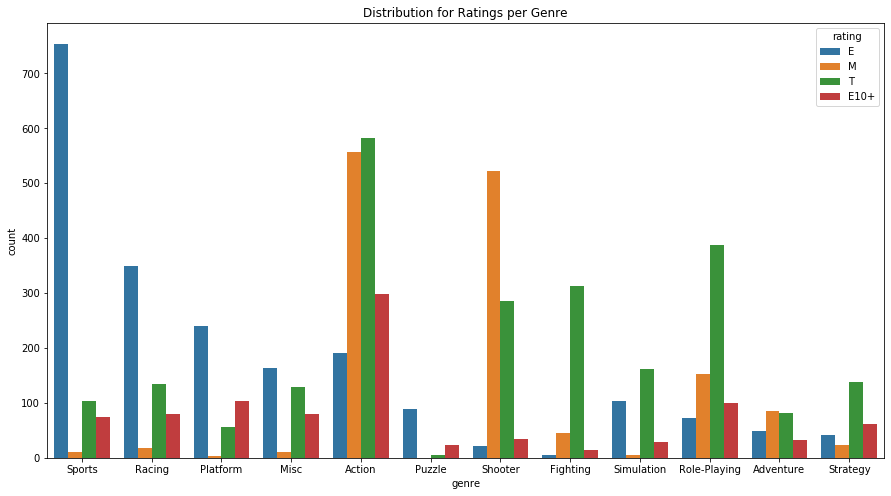

In [47]:
# Use ratings dataframe created before
plt.figure(figsize=(15,8))
sb.countplot(data=ratings_df, x='genre', hue='rating');
plt.title('Distribution for Ratings per Genre');


> Fighiting, and Role-Playing games are mostly aimed towards teens.

> Sports games are aimed towards everyone.

# Multivariate Exploration

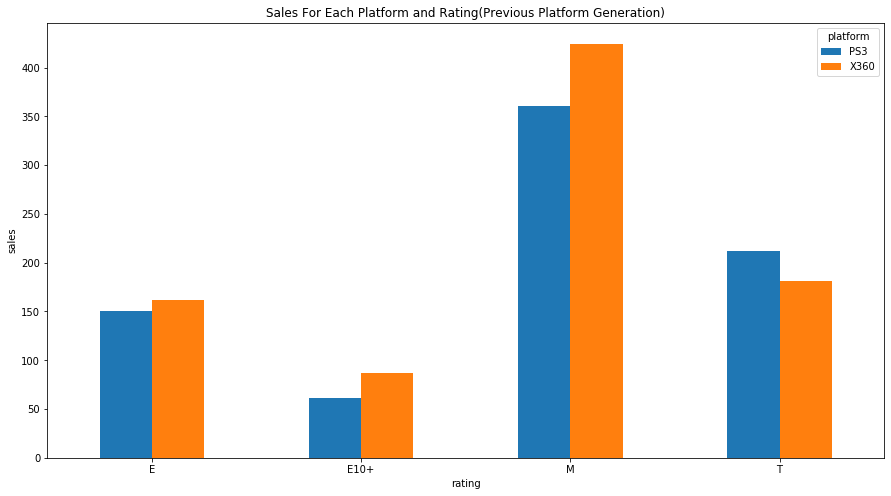

In [21]:
platform_df = ratings_df.query('platform == "PS3" or platform == "X360"')
rating_sales = platform_df.groupby(['rating','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Rating(Previous Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

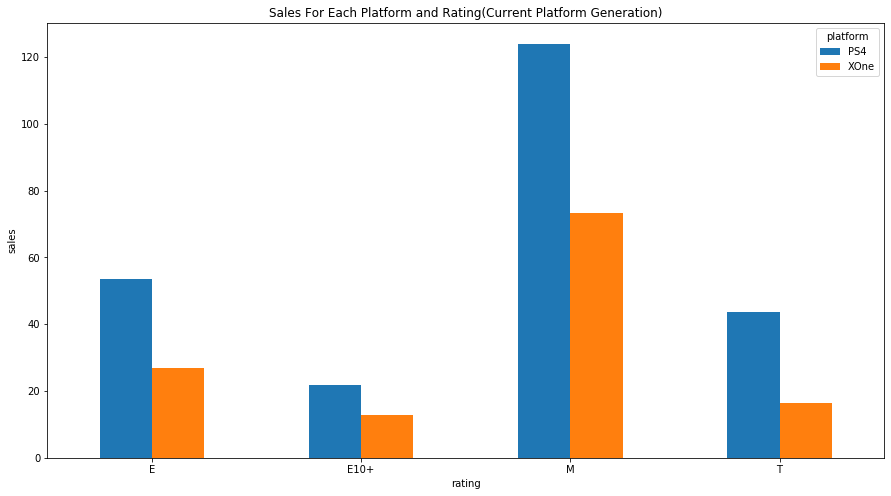

In [22]:
platform_df = ratings_df.query('platform == "PS4" or platform == "XOne"')
rating_sales = platform_df.groupby(['rating','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Rating(Current Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

> These visulas shows that the competition between Xbox 360, and PS3 was close. But in the current genration PS4 dominates the market.

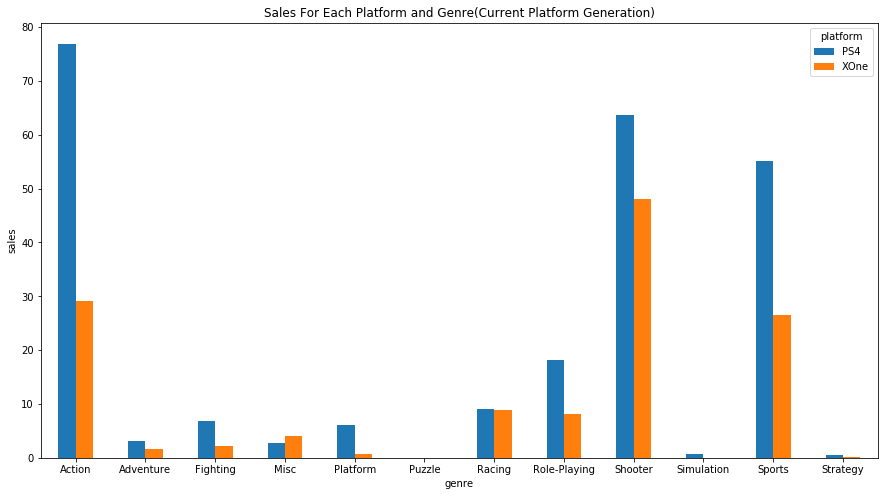

In [25]:
platform_df = ratings_df.query('platform == "PS4" or platform == "XOne"')
rating_sales = platform_df.groupby(['genre','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Genre(Current Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

> All the popular genres sell more on PS4.


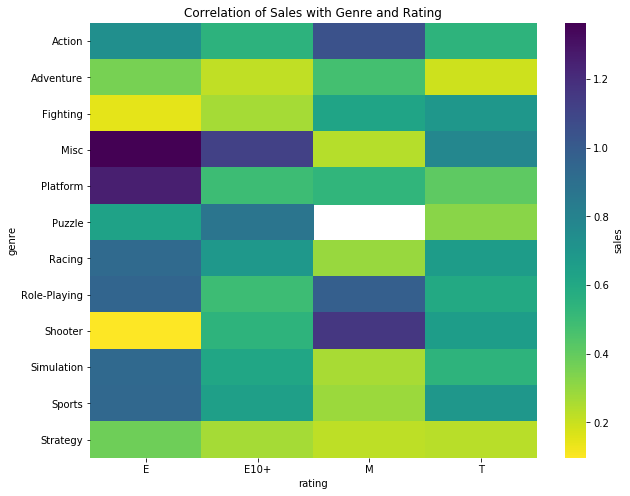

In [45]:
heatmap_data = pd.pivot_table(ratings_df, values='global_sales', index=['genre'], columns='rating')
plt.figure(figsize=(10,8))
plt.title('Correlation of Sales with Genre and Rating')
sb.heatmap(heatmap_data, cmap="viridis_r", cbar_kws={'label': 'sales'});

> We can see that misc games that rated E(for everyone) sell the highest, while puzzle games that are rated M(for mature) sell the least.



# Reference

- Dataset, Video Game Sales with Ratings, https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
